In [17]:
import pandas as pd
import glob
import os
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:

# get all the files end up with  _rankings.csv 
csv_files = glob.glob("*_rankings.csv")

column_sets = {}

for file in csv_files:
    year = os.path.basename(file).split('_')[0]
    df = pd.read_csv(file, nrows=1)  
    column_sets[year] = set(df.columns)

# check whether the variables name are consistent in different years
base = column_sets[list(column_sets.keys())[0]]
for year, cols in column_sets.items():
    if cols != base:
        print(f"❗ {year} is not consistent：")
        print(f"  additional variables：{cols - base}")
        print(f"  lost variables：{base - cols}")
    else:
        print(f"✅ {year} is consistent")

✅ 2011 is consistent
✅ 2012 is consistent
✅ 2013 is consistent
✅ 2014 is consistent
✅ 2015 is consistent
❗ 2016 is not consistent：
  additional variables：{'stats_student_staff_ratio', 'stats_number_students', 'stats_pc_intl_students', 'stats_female_male_ratio'}
  lost variables：set()
❗ 2017 is not consistent：
  additional variables：{'stats_student_staff_ratio', 'stats_number_students', 'stats_pc_intl_students', 'stats_female_male_ratio'}
  lost variables：set()
❗ 2018 is not consistent：
  additional variables：{'stats_student_staff_ratio', 'stats_number_students', 'stats_pc_intl_students', 'stats_female_male_ratio'}
  lost variables：set()
❗ 2019 is not consistent：
  additional variables：{'stats_student_staff_ratio', 'stats_number_students', 'stats_pc_intl_students', 'stats_female_male_ratio'}
  lost variables：set()
❗ 2020 is not consistent：
  additional variables：{'stats_student_staff_ratio', 'stats_number_students', 'stats_pc_intl_students', 'stats_female_male_ratio'}
  lost variables：s

In [13]:
# Initialize a list to store all the data
df_list = []

# Iterate through the dataset to export the data
for file in csv_files:
    year = os.path.basename(file).split('_')[0]
   
    df = pd.read_csv(file)
    df['year'] = int(year)  
    df_list.append(df)

# Combine all the data
all_data = pd.concat(df_list, ignore_index=True)


all_data.columns = all_data.columns.str.strip()

# Have a look at the combined dataset
print("Rows：", all_data.shape)
display(all_data.head())


Rows： (15996, 26)


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,aliases,subjects_offered,closed,unaccredited,year,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr
0,1,1,Harvard University,96.1,1,99.7,1,72.4,49,34.5,...,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2011,NaN,NaN,NaN,NaN,NaN
1,2,2,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,...,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2011,NaN,NaN,NaN,NaN,NaN
2,3,3,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,...,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2011,NaN,NaN,NaN,NaN,NaN
3,4,4,Stanford University,94.3,4,98.3,2,29.5,156,64.3,...,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2011,NaN,NaN,NaN,NaN,NaN
4,5,5,Princeton University,94.2,5,90.9,6,70.3,53,-,...,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2011,NaN,NaN,NaN,NaN,NaN


## Check and Correct data type

In [11]:
# Check the datatype
print(all_data.dtypes)

rank_order                             int64
rank                                  object
name                                  object
scores_overall                        object
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_international_outlook          object
scores_international_outlook_rank      int64
scores_industry_income                object
scores_industry_income_rank            int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
location                              object
aliases                               object
subjects_offered                      object
closed                                  bool
unaccredited                            bool
year                                   int64
stats_number_students                 object
stats_stud

In [16]:
# rank (take the better one)
def clean_rank(value):
    if isinstance(value, str):

        value = value.replace('=', '')
        match = re.match(r'^(\d+)', value)
        if match:
            return float(match.group(1))
        else:
            return np.nan
    try:
        return float(value)
    except:
        return np.nan
all_data['rank'] = all_data['rank'].apply(clean_rank)

# scores （deal with average）
def convert_score(value):
    if isinstance(value, str):
        match = re.match(r'^\s*(\d+(?:\.\d+)?)\s*[-–—]\s*(\d+(?:\.\d+)?)\s*$', value)
        if match:
            low = float(match.group(1))
            high = float(match.group(2))
            return (low + high) / 2
        try:
            return float(value)
        except:
            return np.nan
    return value  

score_columns = ['scores_overall', 'scores_international_outlook', 'scores_industry_income']
for col in score_columns:
    all_data[col] = all_data[col].apply(convert_score)

# stats_number_students
all_data['stats_number_students'] = all_data['stats_number_students'].str.replace(',', '')
all_data['stats_number_students'] = pd.to_numeric(all_data['stats_number_students'], errors='coerce')

# stats_pc_intl_students
all_data['stats_pc_intl_students'] = all_data['stats_pc_intl_students'].str.replace('%', '')
all_data['stats_pc_intl_students'] = pd.to_numeric(all_data['stats_pc_intl_students'], errors='coerce') / 100

# stats_proportion_of_isr
all_data['stats_proportion_of_isr'] = pd.to_numeric(all_data['stats_proportion_of_isr'], errors='coerce')

# female_male_ratio_value
def split_ratio_normalized(ratio_str):
    try:
        female, male = ratio_str.split(':')
        female = float(female)
        male = float(male)
        total = female + male
        if total == 0:
            return np.nan, np.nan
        return female / total, male / total
    except:
        return np.nan, np.nan

# 应用：得到标准化后的两个字段
all_data[['female_ratio', 'male_ratio']] = all_data['stats_female_male_ratio'].apply(
    lambda x: pd.Series(split_ratio_normalized(x))
)


# Check the datatype again
print(all_data.dtypes)

rank_order                             int64
rank                                 float64
name                                  object
scores_overall                       float64
scores_overall_rank                    int64
scores_teaching                      float64
scores_teaching_rank                   int64
scores_international_outlook         float64
scores_international_outlook_rank      int64
scores_industry_income               float64
scores_industry_income_rank            int64
scores_research                      float64
scores_research_rank                   int64
scores_citations                     float64
scores_citations_rank                  int64
location                              object
aliases                               object
subjects_offered                      object
closed                                  bool
unaccredited                            bool
year                                   int64
stats_number_students                float64
stats_stud

## Check outliers

In [25]:
# Manually drop variables that only exist after 2016
columns_to_drop = [
    'stats_student_staff_ratio',
    'stats_number_students',
    'stats_pc_intl_students',
    'stats_female_male_ratio',
    'stats_proportion_of_isr',
    'female_ratio',
    'male_ratio'
]

# Drop these columns from all_data
common_data = all_data.drop(columns=columns_to_drop, errors='ignore').copy()

In [26]:
common_data.head()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,year
0,1,1.0,Harvard University,96.1,1,99.7,1,72.4,49,34.5,...,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2011
1,2,2.0,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,...,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2011
2,3,3.0,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,...,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2011
3,4,4.0,Stanford University,94.3,4,98.3,2,29.5,156,64.3,...,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2011
4,5,5.0,Princeton University,94.2,5,90.9,6,70.3,53,NaN,...,95.4,5,99.9,3,United States,Princeton University,"Languages, Literature & Linguistics,Biological...",False,False,2011


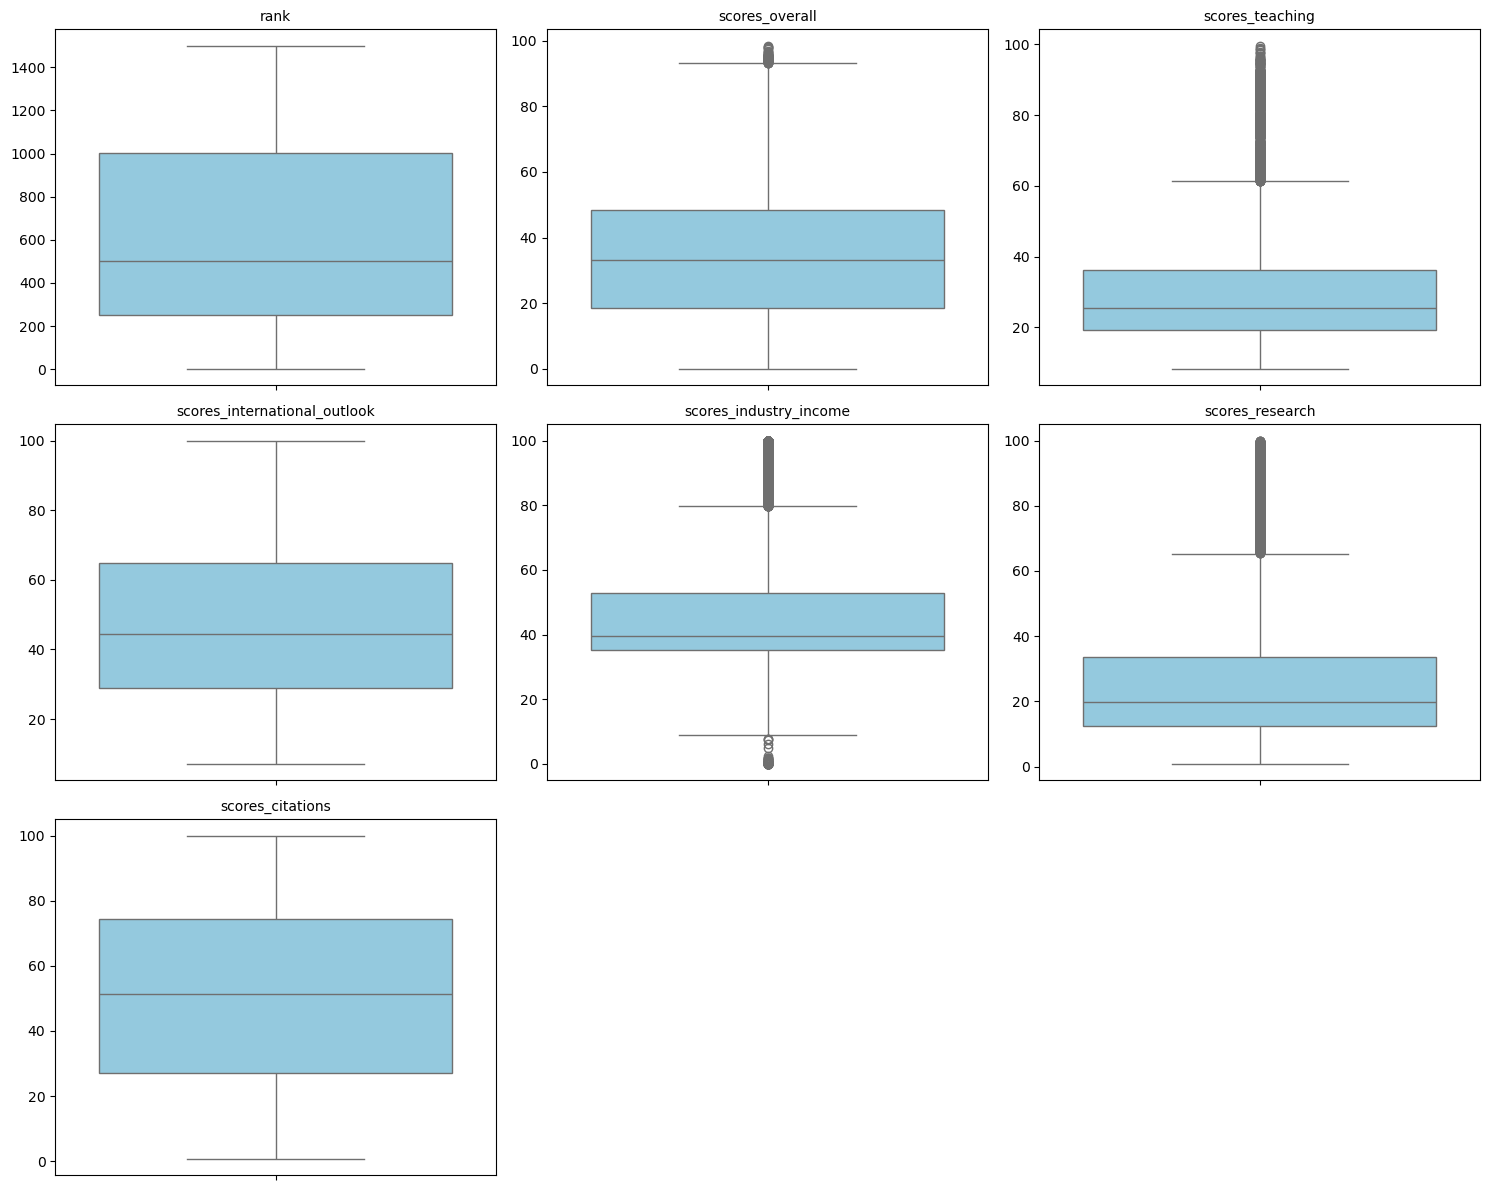

In [27]:
# Exculde ranks and years
exclude_cols = [
    'rank_order', 'scores_overall_rank', 'scores_teaching_rank',
    'scores_international_outlook_rank', 'scores_industry_income_rank',
    'scores_research_rank', 'scores_citations_rank', 'year'
]
numeric_columns = common_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = [col for col in numeric_columns if col not in exclude_cols]

# Using boxplot to visualize the distribution of numeric variables
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Checking missing value

In [28]:
# Count missing values and calculate their percentage
missing_info = common_data.isnull().sum().to_frame(name="Missing Count")
missing_info["Missing %"] = (missing_info["Missing Count"] / len(common_data)) * 100

# Keep only variables with missing values
missing_info = missing_info[missing_info["Missing Count"] > 0]

# Sort by missing count (optional)
missing_info = missing_info.sort_values(by="Missing Count", ascending=False)

# Display
print("Missing values summary:")
display(missing_info)


Missing values summary:


,Missing Count,Missing %
scores_overall,2563,16.022756
scores_industry_income,1942,12.140535
rank,1851,11.571643
scores_international_outlook,1770,11.065266
scores_teaching,1761,11.009002
scores_research,1761,11.009002
scores_citations,1761,11.009002
subjects_offered,53,0.331333
location,1,0.006252


In [29]:
clean_data = common_data.dropna().copy()

# Have a look at the cleaned dataset
print("Rows：", clean_data.shape)
display(clean_data.head())


Rows： (13166, 21)


,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,scores_industry_income,...,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited,year
0,1,1.0,Harvard University,96.1,1,99.7,1,72.4,49,34.5,...,98.7,2,98.8,8,United States,Harvard University,"Mathematics & Statistics,Civil Engineering,Lan...",False,False,2011
1,2,2.0,California Institute of Technology,96.0,2,97.7,4,54.6,93,83.7,...,98.0,4,99.9,1,United States,California Institute of Technology caltech,"Languages, Literature & Linguistics,Economics ...",False,False,2011
2,3,3.0,Massachusetts Institute of Technology,95.6,3,97.8,3,82.3,36,87.5,...,91.4,11,99.9,2,United States,Massachusetts Institute of Technology,"Mathematics & Statistics,Languages, Literature...",False,False,2011
3,4,4.0,Stanford University,94.3,4,98.3,2,29.5,156,64.3,...,98.1,3,99.2,6,United States,Stanford University,"Physics & Astronomy,Computer Science,Politics ...",False,False,2011
5,6,6.0,University of Oxford,91.2,7,88.2,9,77.2,42,73.5,...,93.9,8,95.1,22,United Kingdom,University of Oxford,"Accounting & Finance,General Engineering,Commu...",False,False,2011


In [32]:
# Save the cleaned dataset to CSV
clean_data.to_csv("cleaned_university_data.csv", index=False)

print("File saved as cleaned_university_data.csv")

File saved as cleaned_university_data.csv


# EDA

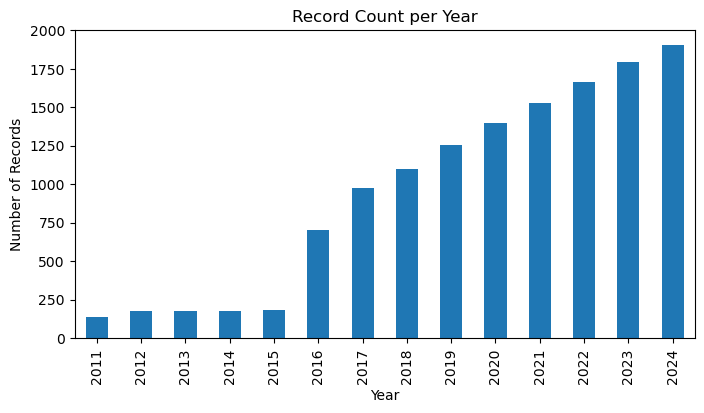

In [30]:
# Year distribution
plt.figure(figsize=(8, 4))
clean_data['year'].value_counts().sort_index().plot(kind='bar')
plt.title("Record Count per Year")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.show()

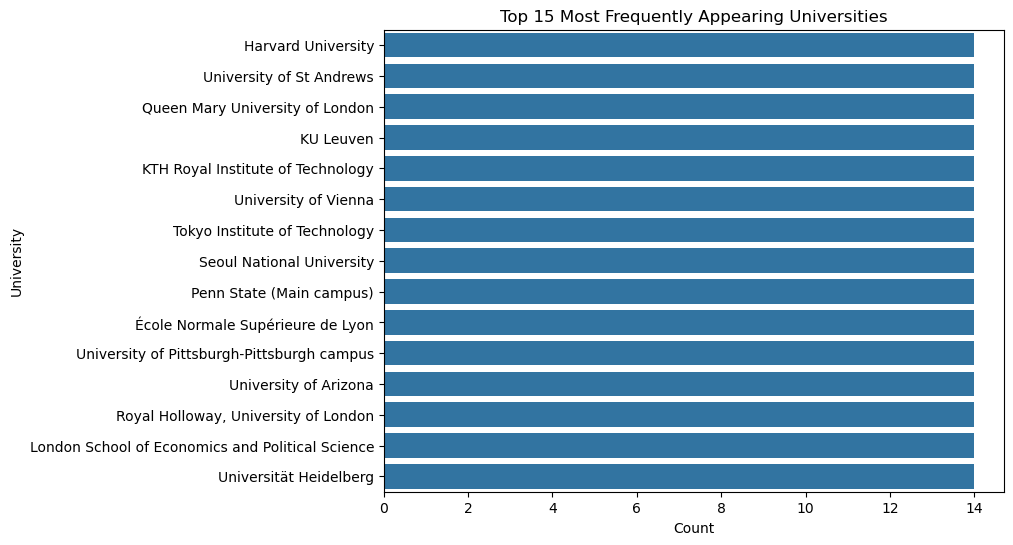

In [31]:
# Top universities by appearance
top_unis = clean_data['name'].value_counts().head(15)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_unis.index, x=top_unis.values)
plt.title("Top 15 Most Frequently Appearing Universities")
plt.xlabel("Count")
plt.ylabel("University")
plt.show()
